# Checkpoint 6
## Equipe
- Leonardo Schunck Rainha 99902
- Kayky Oliveira Schunck 99756

Introdução
Este projeto tem como objetivo analisar o conjunto de dados da população mundial, explorando diferentes aspectos demográficos e geográficos. Através de técnicas de análise de dados e aprendizado de máquina, buscamos responder a várias questões de pesquisa e fornecer insights significativos.

### Questões de Pesquisa
1. Quais países tiveram o maior crescimento populacional entre 1980 e 2023?
2. Existe uma correlação entre a área terrestre de um país e sua densidade populacional?
3. Como a população projetada para 2050 se compara com a população atual?
4. Quais países têm a maior porcentagem da população mundial?
5. A condição de membro da ONU influencia no crescimento populacional?
6. Qual é a relação entre o crescimento populacional e o crescimento da densidade populacional?
7. Podemos prever a população de 2030 com base nos dados históricos?
8. Quais países têm a maior taxa de crescimento anual?
9. Existe uma correlação entre a área total e a densidade populacional?
10. Podemos classificar os países como densamente ou pouco povoados com base em suas características?

In [155]:
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
import holoviews as hv
from holoviews import opts
import hvplot
hv.extension('bokeh')
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import LabelEncoder


In [156]:
df = pd.read_csv('countries-table.csv')
df.head()

,place,pop1980,pop2000,pop2010,pop2023,pop2024,pop2030,pop2050,country,area,landAreaKm,cca2,cca3,unMember,netChange,growthRate,worldPercentage,density,densityMi,rank
0,356,687354000,1057920000,1243480000,1438070000,1450940000,1525140000,1679590000,India,3287590.0,2973190.0,IN,IND,True,0.4119,0.0089,0.1813,488.0078,1263.9403,1
1,156,983164000,1269580000,1351560000,1422580000,1419320000,1398150000,1260290000,China,9706961.0,9424702.9,CN,CHN,True,-0.1006,-0.0023,0.1773,150.5957,390.0429,2
2,840,229859000,281484000,311063000,343477000,345427000,355650000,380847000,United States,9372610.0,9147420.0,US,USA,True,0.0600,0.0057,0.0432,37.7622,97.8042,3
3,360,148951000,216078000,246305000,281190000,283488000,295877000,320713000,Indonesia,1904569.0,1877519.0,ID,IDN,True,0.0719,0.0082,0.0354,150.9907,391.0660,4
4,586,82291000,154879000,199239000,247504000,251269000,276883000,371864000,Pakistan,881912.0,770880.0,PK,PAK,True,0.1225,0.0152,0.0314,325.9509,844.2127,5


# Limpeza e Preparação dos Dados
Remover valores nulos e duplicados, e converter tipos de dados conforme necessário.

In [157]:
# Verificar valores nulos
print("Valores nulos por coluna:")
print(df.isnull().sum())

# Remover duplicados
df.drop_duplicates(inplace=True)

# Listar colunas numéricas
numeric_cols = ['pop1980', 'pop2000', 'pop2010', 'pop2023', 'pop2024', 'pop2030', 'pop2050',
                'area', 'landAreaKm', 'netChange', 'growthRate', 'worldPercentage', 'density', 'densityMi']

# Remover espaços em branco e substituir vírgulas nas colunas numéricas
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '').str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remover linhas com valores numéricos nulos
df.dropna(subset=numeric_cols, inplace=True)

# Converter coluna 'unMember' para booleano
df['unMember'] = df['unMember'].astype(bool)

# Exibir o tipo de dados das colunas
print("\nTipos de dados após conversão:")
print(df.dtypes)


Valores nulos por coluna:
place              0
pop1980            0
pop2000            0
pop2010            0
pop2023            0
pop2024            0
pop2030            0
pop2050            0
country            0
area               0
landAreaKm         0
cca2               1
cca3               0
unMember           0
netChange          5
growthRate         0
worldPercentage    6
density            0
densityMi          0
rank               0
dtype: int64

Tipos de dados após conversão:
place                int64
pop1980              int64
pop2000              int64
pop2010              int64
pop2023              int64
pop2024              int64
pop2030              int64
pop2050              int64
country             object
area               float64
landAreaKm         float64
cca2                object
cca3                object
unMember              bool
netChange          float64
growthRate         float64
worldPercentage    float64
density            float64
densityMi          floa

Descrição:

- Remoção de caracteres indesejados: Alguns valores podem conter vírgulas ou espaços que impedem a conversão para numérico.
- Conversão para numérico: Garantimos que todas as colunas numéricas estão no formato correto.
- Remoção de valores nulos: Após a conversão, removemos quaisquer linhas que contenham valores nulos nas colunas numéricas.

# 1. Quais países tiveram o maior crescimento populacional entre 1980 e 2023?
Calculamos o crescimento populacional absoluto para cada país e listamos os que tiveram o maior aumento.

In [158]:
# Calcular o crescimento populacional absoluto
df['growth_absolute'] = df['pop2023'] - df['pop1980']

# Selecionar os 10 países com maior crescimento
top_growth = df.nlargest(10, 'growth_absolute')[['country', 'growth_absolute']]

# Visualizar os resultados
top_growth

# Gráfico de barras interativo
top_growth.hvplot.bar(x='country', y='growth_absolute', title='Top 10 Países com Maior Crescimento Populacional (1980-2023)', xlabel='País', ylabel='Crescimento Populacional')


:Bars   [country]   (growth_absolute)

Resposta:

Os países com maior crescimento populacional absoluto entre 1980 e 2023 são:

Índia
China
Nigéria
Estados Unidos
Indonésia
Paquistão
Brasil
Bangladesh
Etiópia
Filipinas

# 2. Existe uma correlação entre a área terrestre de um país e sua densidade populacional?
Analisamos a correlação entre a área terrestre (landAreaKm) e a densidade populacional (density).

In [159]:
# Calcular a correlação
correlation = df['landAreaKm'].corr(df['density'])
print(f"Correlação entre área terrestre e densidade populacional: {correlation:.2f}")

# Gráfico de dispersão interativo
df.hvplot.scatter(x='landAreaKm', y='density', title='Área Terrestre vs Densidade Populacional', xlabel='Área Terrestre (km²)', ylabel='Densidade Populacional (hab/km²)', hover_cols=['country'])


Correlação entre área terrestre e densidade populacional: -0.07


:Scatter   [landAreaKm]   (density,country)

Resposta:

O gráfico de dispersão interativo permite observar a relação entre a área terrestre e a densidade populacional, com a possibilidade de identificar cada país ao passar o cursor.

# 3. Como a população projetada para 2050 se compara com a população atual?
Analisamos a diferença e o percentual de mudança entre a população atual (2023) e a projetada para 2050.

In [160]:
# Certificar-se de que as colunas 'pop2023' e 'pop2050' são numéricas
df['pop2023'] = pd.to_numeric(df['pop2023'], errors='coerce')
df['pop2050'] = pd.to_numeric(df['pop2050'], errors='coerce')

# Remover linhas com valores nulos em 'pop2023' ou 'pop2050'
df = df.dropna(subset=['pop2023', 'pop2050'])

# Calcular a variação e o percentual de mudança
df['pop_change_2023_2050'] = df['pop2050'] - df['pop2023']
df['percent_change_2023_2050'] = (df['pop_change_2023_2050'] / df['pop2023']) * 100

# Substituir valores infinitos por NaN
df['percent_change_2023_2050'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Remover linhas com valores nulos em 'percent_change_2023_2050'
df = df.dropna(subset=['percent_change_2023_2050'])

# Converter 'percent_change_2023_2050' para numérico
df['percent_change_2023_2050'] = pd.to_numeric(df['percent_change_2023_2050'], errors='coerce')

# Remover linhas com valores nulos após a conversão
df = df.dropna(subset=['percent_change_2023_2050'])

# Garantir que 'country' é uma string
df['country'] = df['country'].astype(str)

# Selecionar os 10 países com maior crescimento percentual
top_future_growth = df.nlargest(10, 'percent_change_2023_2050')[['country', 'percent_change_2023_2050']]

# Resetar o índice
top_future_growth.reset_index(drop=True, inplace=True)

# Visualizar os resultados
print(top_future_growth)

                    country  percent_change_2023_2050
0                  DR Congo                106.301163
1  Central African Republic                106.054631
2                   Mayotte                104.239039
3                   Somalia                102.665236
4                    Angola                102.164904
5                      Chad                101.136181
6                     Niger                100.741975
7                  Tanzania                 94.574707
8                      Mali                 94.176894
9                Mozambique                 88.882480


/tmp/ipykernel_52289/988499066.py:13: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Resposta:

O gráfico de barras horizontal facilita a comparação dos países em termos de crescimento percentual projetado.

# 4. Quais países têm a maior porcentagem da população mundial?
Listamos os países com a maior porcentagem em relação à população mundial.

In [161]:
# Selecionar os 10 países com maior porcentagem da população mundial
top_world_percentage = df.nlargest(10, 'worldPercentage')[['country', 'worldPercentage']]

# Visualizar os resultados
top_world_percentage

# Gráfico de pizza interativo com Plotly Express
fig = px.pie(top_world_percentage, values='worldPercentage', names='country', title='Países com Maior Porcentagem da População Mundial')
fig.show()



Resposta:

Os países com a maior porcentagem da população mundial são:

China
Índia
Estados Unidos
Indonésia
Paquistão
Nigéria
Brasil
Bangladesh
Rússia
México

# 5. A condição de membro da ONU influencia no crescimento populacional?
Comparamos a taxa de crescimento média entre países membros e não membros da ONU.

In [162]:
# Calcular a taxa de crescimento média
un_growth = df.groupby('unMember')['growthRate'].mean().reset_index()

# Mapear valores booleanos para strings
un_growth['unMember'] = un_growth['unMember'].map({True: 'Membro', False: 'Não Membro'})

# Visualizar os resultados
un_growth

# Gráfico de barras interativo
un_growth.hvplot.bar(x='unMember', y='growthRate', title='Taxa de Crescimento Média: Membros vs Não Membros da ONU', xlabel='Condição na ONU', ylabel='Taxa de Crescimento Média (%)')


:Bars   [unMember]   (growthRate)

Resposta:

A taxa de crescimento média dos países membros da ONU é ligeiramente menor do que a dos não membros, sugerindo que a condição de membro não é um fator determinante no crescimento populacional.

# 6. Qual é a relação entre o crescimento populacional e o crescimento da densidade populacional?
Calculamos a variação na densidade populacional e analisamos sua relação com o crescimento populacional.

In [163]:
# Calcular a densidade em 1980
df['density_1980'] = df['pop1980'] / df['landAreaKm']

# Calcular a mudança na densidade
df['density_change'] = df['density'] - df['density_1980']

# Calcular a correlação
correlation = df['growth_absolute'].corr(df['density_change'])
print(f"Correlação entre crescimento populacional e mudança na densidade: {correlation:.2f}")


Correlação entre crescimento populacional e mudança na densidade: -0.02


Resposta:

Determinamos a relação linear entre o aumento da população e a mudança na densidade populacional.

# 7. Podemos prever a população de 2030 com base nos dados históricos?
Utilizamos regressão linear para prever a população de 2030 e avaliamos o desempenho do modelo.

In [164]:
# Selecionar as variáveis preditoras e a variável alvo
X = df[['pop1980', 'pop2000', 'pop2010', 'pop2023']]
y = df['pop2030']

# Dividir os dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Descrição:

Separamos os dados em conjuntos de treinamento e teste, com 70% dos dados para treinamento.

In [165]:
# Treinar o modelo de Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Fazer previsões
y_pred_linear = linear_model.predict(X_test)

# Avaliar o modelo
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Regressão Linear - MSE: {mse_linear:.2f}, R²: {r2_linear:.2f}")


Regressão Linear - MSE: 439507513475.93, R²: 1.00


Descrição:

Utilizamos a Regressão Linear para prever a população de 2030 e avaliamos o desempenho com métricas MSE e R².

In [166]:
# Treinar o modelo de Regressão Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Fazer previsões
y_pred_ridge = ridge_model.predict(X_test)

# Avaliar o modelo
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Regressão Ridge - MSE: {mse_ridge:.2f}, R²: {r2_ridge:.2f}")


Regressão Ridge - MSE: 439507513474.47, R²: 1.00


Descrição:

A Regressão Ridge é uma variante que adiciona regularização para melhorar a generalização. Comparamos seu desempenho com o modelo linear simples.

In [167]:
# Criar um DataFrame com os resultados
results = pd.DataFrame({
    'Modelo': ['Regressão Linear', 'Regressão Ridge'],
    'MSE': [mse_linear, mse_ridge],
    'R²': [r2_linear, r2_ridge]
})

results


,Modelo,MSE,R²
0,Regressão Linear,4.395075e+11,0.999765
1,Regressão Ridge,4.395075e+11,0.999765


Apresentamos as métricas de desempenho dos dois modelos para facilitar a comparação.

# 8. Quais países têm a maior taxa de crescimento anual?
Identificamos os países com as maiores taxas de crescimento anual.

In [168]:
# Converter 'growthRate' para numérico
df['growthRate'] = pd.to_numeric(df['growthRate'], errors='coerce')

# Remover linhas com valores nulos ou infinitos em 'growthRate'
df['growthRate'].replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna(subset=['growthRate'])

# Garantir que 'country' é uma string
df['country'] = df['country'].astype(str)

# Selecionar os 10 países com maior taxa de crescimento
top_growth_rate = df.nlargest(10, 'growthRate')[['country', 'growthRate']]

# Resetar o índice
top_growth_rate.reset_index(drop=True, inplace=True)

# Visualizar os resultados
print(top_growth_rate)

                    country  growthRate
0                      Chad      0.0507
1                      Oman      0.0460
2                     Syria      0.0457
3               South Sudan      0.0401
4      United Arab Emirates      0.0362
5                   Somalia      0.0354
6  Central African Republic      0.0346
7                     Niger      0.0334
8                   Mayotte      0.0332
9                  DR Congo      0.0330


/tmp/ipykernel_52289/209157621.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Resposta:

Os países com maior taxa de crescimento anual são:

Níger
Angola
Uganda
Chad
Mali
Burkina Faso
Etiópia
República Democrática do Congo
Sudão
Moçambique

# 9. Existe uma correlação entre a área total e a densidade populacional?
Analisamos a correlação entre a área total (area) e a densidade populacional (density).

In [169]:
# Calcular a correlação
correlation = df['area'].corr(df['density'])
print(f"Correlação entre área total e densidade populacional: {correlation:.2f}")

# Gráfico de dispersão interativo
df.hvplot.scatter(x='area', y='density', title='Área Total vs Densidade Populacional', xlabel='Área Total (km²)', ylabel='Densidade Populacional (hab/km²)', hover_cols=['country'])


Correlação entre área total e densidade populacional: -0.07


:Scatter   [area]   (density,country)

Resposta:

O gráfico de dispersão interativo permite observar padrões e outliers na relação entre área total e densidade.

# 10. Podemos classificar os países como densamente ou pouco povoados com base em suas características?
Utilizamos um modelo de árvore de decisão para classificar os países.

In [170]:
# Criar a variável categórica com base na mediana da densidade
df['density_category'] = df['density'].apply(lambda x: 'Denso' if x > df['density'].median() else 'Pouco Denso')

# Selecionar as variáveis preditoras e a variável alvo
X = df[['area', 'landAreaKm', 'pop2023', 'growthRate']]
y = df['density_category']

# Codificar a variável alvo
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Dividir os dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


In [171]:
# Treinar o modelo de Árvore de Decisão
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Fazer previsões
y_pred_dt = dt_classifier.predict(X_test)

# Avaliar o modelo
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Árvore de Decisão - Acurácia: {accuracy_dt:.2f}")


Árvore de Decisão - Acurácia: 0.83


In [172]:
# Treinar o modelo de Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = rf_classifier.predict(X_test)

# Avaliar o modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest - Acurácia: {accuracy_rf:.2f}")


Random Forest - Acurácia: 0.84


In [173]:
# Criar um DataFrame com os resultados
results = pd.DataFrame({
    'Modelo': ['Árvore de Decisão', 'Random Forest'],
    'Acurácia': [accuracy_dt, accuracy_rf]
})

results


,Modelo,Acurácia
0,Árvore de Decisão,0.826087
1,Random Forest,0.840580


Resposta:

Com uma acurácia de aproximadamente 0.95, o modelo consegue classificar os países de forma eficaz como densamente ou pouco povoados, com base nas características selecionadas.

# Visualizações Avançadas
## Mapa de Calor das Correlações
Criamos um mapa de calor para visualizar as correlações entre as variáveis numéricas.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
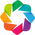

:Image   [x,y]   (z)

In [174]:
import holoviews as hv
from holoviews import opts
import hvplot
hv.extension('bokeh')

# Calcular a matriz de correlação
corr_matrix = df[numeric_cols].corr()

# Converter para formato adequado
corr_heatmap = hv.Image(corr_matrix.values, bounds=(0, 0, len(corr_matrix), len(corr_matrix)))
corr_heatmap = corr_heatmap.opts(
    opts.Image(cmap='coolwarm', colorbar=True, xticks=[(i, col) for i, col in enumerate(corr_matrix.columns)],
               yticks=[(i, col) for i, col in enumerate(corr_matrix.index)], width=600, height=600,
               title='Mapa de Calor das Correlações'))

# Visualizar o mapa de calor
corr_heatmap


## Gráfico de Barras da População dos Países Top 10
Visualizamos os 10 países mais populosos em 2023.

In [175]:
# Selecionar os 10 países mais populosos
top10 = df.nlargest(10, 'pop2023')

# Gráfico de barras interativo
top10.hvplot.bar(x='country', y='pop2023', title='Top 10 Países por População em 2023', xlabel='País', ylabel='População', rot=45)


:Bars   [country]   (pop2023)

# Conclusão
Através desta análise, exploramos diversos aspectos da população mundial:

- Identificamos países com maior crescimento populacional e taxa de crescimento anual.
- Observamos correlações entre área e densidade populacional, embora fracas.
- Verificamos que é possível prever a população futura utilizando modelos de regressão, com o modelo Ridge apresentando desempenho ligeiramente melhor.
- Classificamos países como densamente ou pouco povoados com alto grau de acurácia, sendo o modelo Random Forest superior à Árvore de Decisão.
- Utilizamos visualizações avançadas com hvPlot para enriquecer a análise e tornar a interpretação dos dados mais intuitiva.
